# Module import 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import os
import warnings

sns.set(style='whitegrid')
warnings.simplefilter('ignore')

# Data preprocessing

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Project_3. Exploratory Data Analysis.ipynb',
 'stud_math.csv']

In [3]:
# os.getcwd()
# os.rename('C:\\Users\\glavr\\GitHub\\skillfactory_rds\\module_2\stud_math.csv.csv',
#           'C:\\Users\\glavr\\GitHub\\skillfactory_rds\\module_2\stud_math.csv')

In [4]:
data = pd.read_csv('stud_math.csv')
display(data.head())
display(data.info())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [6]:
data.describe(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


> It makes sense to bring all columns to the same format for comfort

In [7]:
data.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
                'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
                'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
                'study_time_2', 'higher', 'internet', 'romantic', 'fam_rel',
                'free_time', 'go_out', 'health', 'absences', 'score']

## Column review

> It is necessary to go over each column step by step in order to unify the data, clean significant outliers and fill (delete) missing values


**I will make some functions in order to draw big plots with minimum coding:**

In [8]:
def distplot(column, kde=True, bins=10):
    """
    This function create a basic seaborn distplot
    for an entered column with certain parameters
    """
    fig = plt.figure()
    axes= fig.add_axes([0, 0, 1.4, 1.2])
    sns.distplot(column, kde=kde, bins=bins)
    plt.xticks(size=15)
    plt.yticks(size=15)

In [9]:
def countplot(column, hue=None):
    """
    This function creates a basic seaborn countplot 
    for an entered column with certain parameters
    """
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1.4, 1.2])
    sns.countplot(column, hue=hue)
    plt.yticks(size=15)
    plt.xticks(size=15)

In [10]:
def boxplot(column, showmeans=True):
    """
    This function creates a basic seaborn boxplot 
    for an entered column with certain parameters
    """
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1.4, 1.2])
    sns.boxplot(column, showmeans=showmeans)
    plt.yticks(size=15)
    plt.xticks(size=15)

### School

In [11]:
print(f'Number of unique values: {len(data.school.unique())}')
print(f'The values themselves: {data.school.unique()}')

Number of unique values: 2
The values themselves: ['GP' 'MS']


In [12]:
data.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


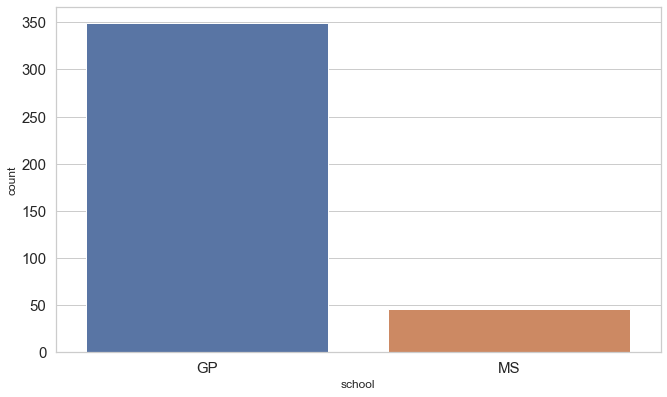

In [13]:
countplot(data.school)

> * The overwhelming majority of students are from GP school (about 7 times more students than in MS)
> * Such a difference could probably tell us that MS is a more luxurious school than GP which we will prove or disprove later

### Sex

In [14]:
data.sex.unique()

array(['F', 'M'], dtype=object)

In [15]:
data.loc[:, ['sex']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


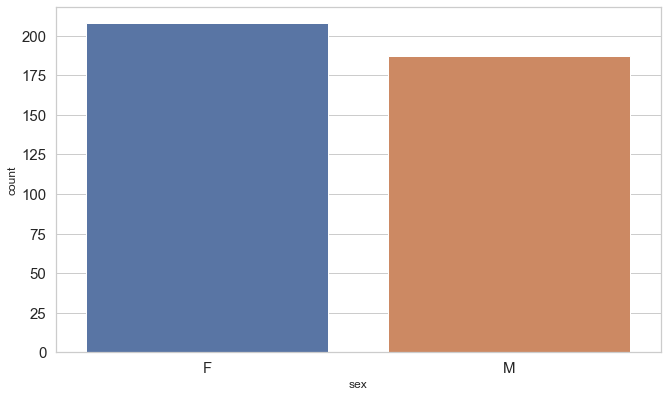

In [16]:
countplot(data.sex)

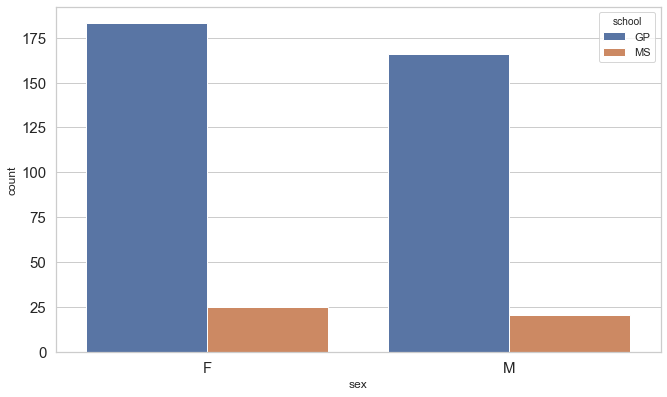

In [17]:
countplot(data.sex, hue=data.school)

> * The distribution of boys and girls is quite similar in general as well as for each school separately
> * There is almost no gender disproportion

### Age 

In [18]:
data.age.unique()

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

In [19]:
print(f'Age interval: {data.age.min(), data.age.max()}')

Age interval: (15, 22)


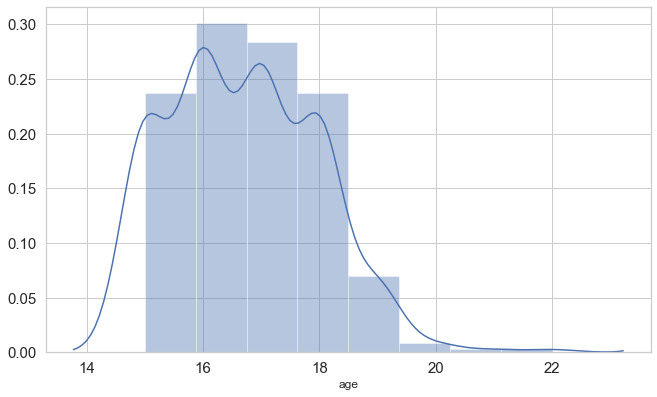

In [20]:
distplot(data.age, bins=8)

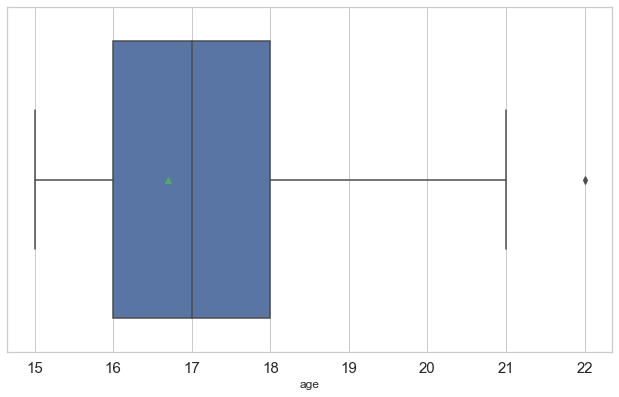

In [21]:
boxplot(data.age)

In [193]:
print(f'Median age for dataset: {data.age.median()}')
print(f'Average age for dataset: {data.age.mean()}')

Median age for dataset: 17.0
Average age for dataset: 16.68274111675127


> * The distribution is close to normal
> * There is only one 22-year-old student who can be considered as an outlier
> * It is better to get rid from such an observation

In [195]:
data.loc[:, ['age']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     394 non-null    int64
dtypes: int64(1)
memory usage: 16.2 KB


### Address

In [24]:
data.address.unique()

array(['U', nan, 'R'], dtype=object)

In [25]:
def nan_killer(x):
    """
    This function substitutes nan-values
    (also in a string format) with None 
    values in a column
    """
    if pd.isnull(x) or str(x).lower() == 'nan' or str(x).strip() == '':
        return None
    return x

In [26]:
data.address = data.address.astype(str).apply(nan_killer)
data.address.unique()

array(['U', None, 'R'], dtype=object)

In [27]:
print(f'Number of missing values: {len(data.loc[data.address.isnull()])}')

Number of missing values: 17


In [28]:
data.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  377 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


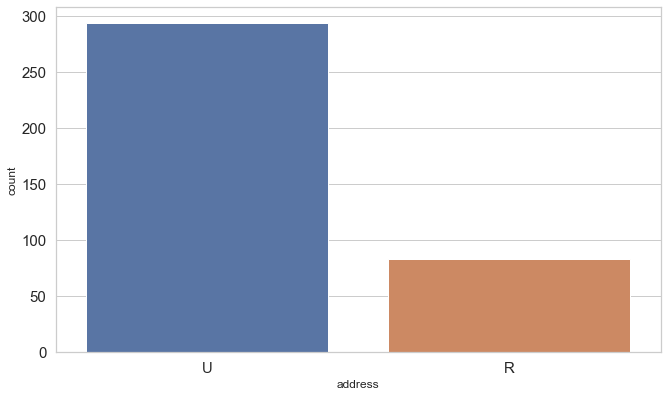

In [29]:
countplot(data.address)

> * Most students are from urban area
> * It is possible to fill missing values according to current proportion of students living in urban and rural areas
> * Another way is to take into account the travel time of students from different areas

**Let's take a look at travel time of urban and rural students**

Text(0.5, 1.0, 'Urban')

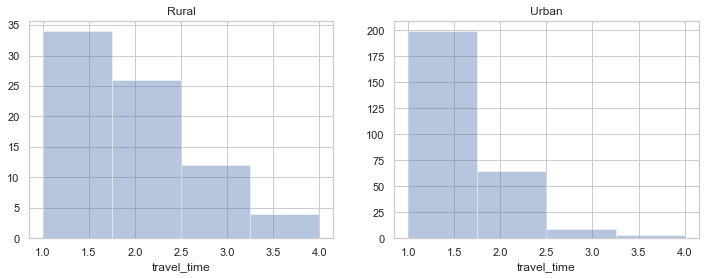

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.distplot(data.loc[data.address == 'R'].travel_time,
             ax=axes[0], bins=4, kde=False)
axes[0].set_title('Rural')

sns.distplot(data.loc[data.address == 'U'].travel_time,
             ax=axes[1], bins=4, kde=False)
axes[1].set_title('Urban')

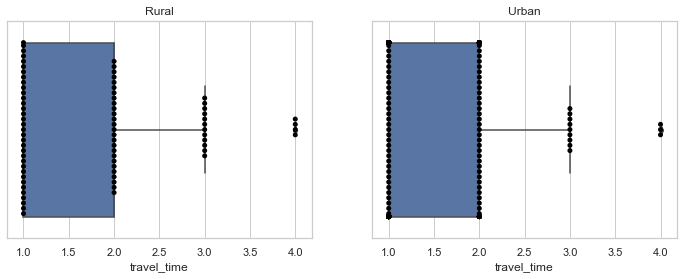

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(data.loc[data.address == 'R'].travel_time, ax=axes[0])
axes[0].set_title('Rural')
sns.swarmplot(data.loc[data.address == 'R'].travel_time,
              color="black", ax=axes[0])

sns.boxplot(data.loc[data.address == 'U'].travel_time, ax=axes[1])
axes[1].set_title('Urban')
sns.swarmplot(data.loc[data.address == 'U'].travel_time,
              color="black", ax=axes[1])

In [32]:
print(f"""Median travel time for urban and rural students: {data.loc[data.address == 'U'].travel_time.median(),
                                                          data.loc[data.address == 'R'].travel_time.median()}""")
print(f"""Mean travel time for urban and rural students: {data.loc[data.address == 'U'].travel_time.mean(),
                                                          data.loc[data.address == 'R'].travel_time.mean()}""")

Median travel time for urban and rural students: (1.0, 2.0)
Mean travel time for urban and rural students: (1.3333333333333333, 1.8157894736842106)


Let's conduct Student's t-test to figure out if this time difference is statistically significant (all the premises are valid):

H0: mean(urban) = mean(rural)

Ha: mean(urban) < mean(rural)

In [33]:
print(f"""p-value: {scipy.stats.ttest_ind(data.loc[data.address == 'U'].travel_time, 
                                          data.loc[data.address == 'R'].travel_time,
                                          nan_policy='omit').pvalue}""")

p-value: 5.218862560613031e-08


p-value < alpha = 0.05 => We reject H0

So it became obvious than in average urban students spend less than rural students on their way and there is a statistically 
significant difference to fill missing values in accordance with this (time) parameter:

In [34]:
def fill_address(row):
    """
    This function fills the address column
    in accordance with the value in travel time
    column
    """
    if row.travel_time <= 2:
        row.address = 'U'
        return row
    else:
        row.address = 'R'
        return row

In [35]:
data = data.apply(fill_address, axis=1)
data.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  394 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


> Finally, all the missing values in address column are filled

###  Family size

In [36]:
data.fam_size.unique()

array([nan, 'GT3', 'LE3'], dtype=object)

In [37]:
data.fam_size = data.fam_size.apply(nan_killer)
data.fam_size.unique()

array([None, 'GT3', 'LE3'], dtype=object)

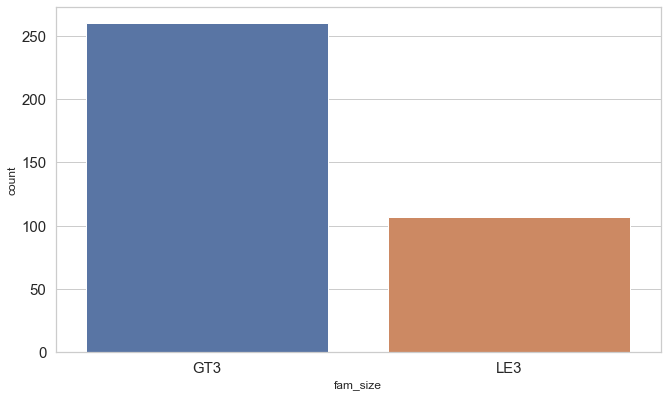

In [38]:
countplot(data.fam_size)

> Most students have families with less than 3 family members

Let's fill missing values with backfill method from Pandas:

In [197]:
data.fam_size.fillna(method='bfill', inplace=True)

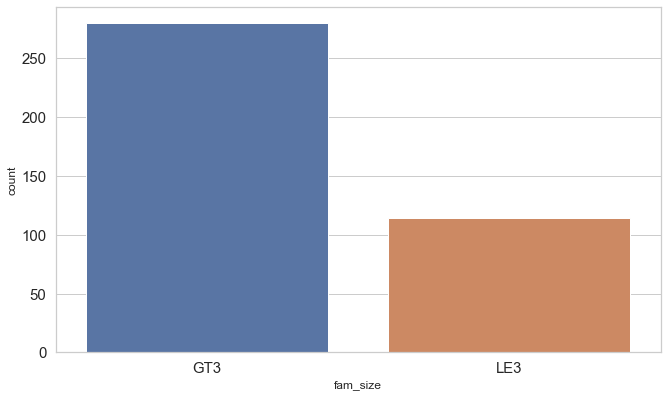

In [199]:
countplot(data.fam_size)

In [198]:
data.loc[:, ['fam_size']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fam_size  394 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


### Parents' joint housing status (live apart or together)

In [40]:
data.p_status.unique()

array(['A', nan, 'T'], dtype=object)

In [41]:
data.p_status = data.p_status.apply(nan_killer)
data.p_status.unique()

array(['A', None, 'T'], dtype=object)

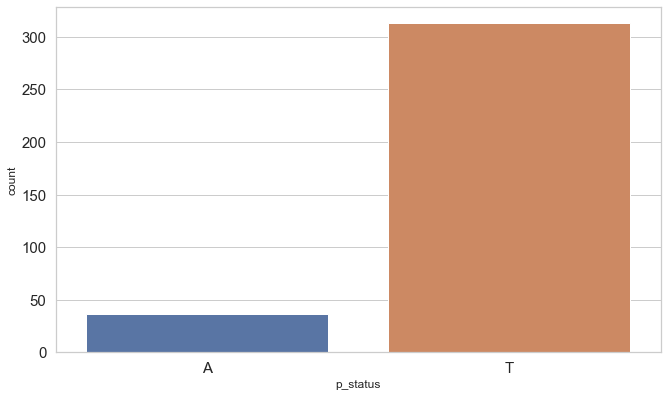

In [42]:
countplot(data.p_status)

In [43]:
data.loc[:, ['p_status']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_status  349 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


> Most parents live together

### Mother's education


In [44]:
data.m_edu.unique()

array([ 4.,  1.,  3.,  2., nan,  0.])

In [45]:
data.m_edu = data.m_edu.apply(nan_killer)
data.m_edu.unique()

array([ 4.,  1.,  3.,  2., nan,  0.])

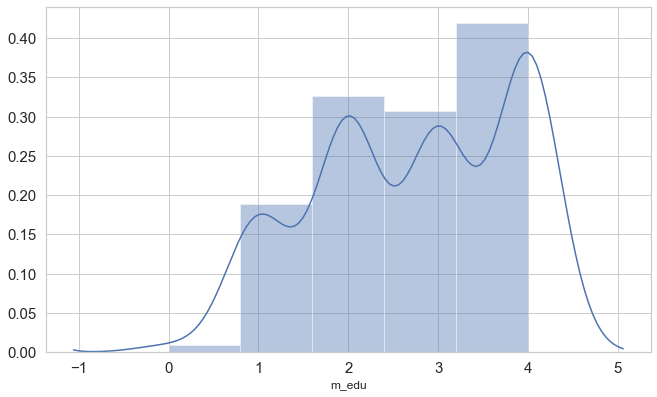

In [46]:
distplot(data.m_edu, bins=5)

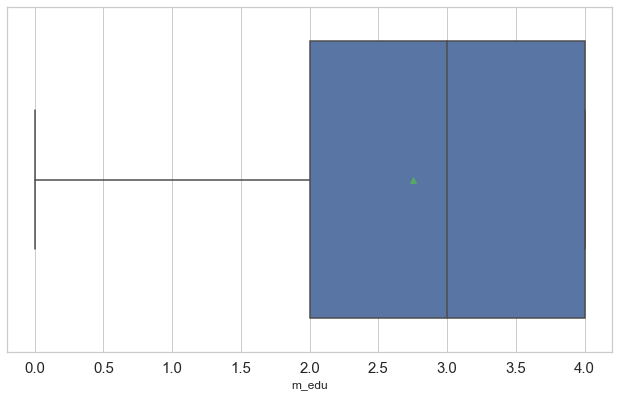

In [47]:
boxplot(data.m_edu)

In [48]:
data.loc[:, ['m_edu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   391 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


> * The are no outliers among mother's education values
> * The are only 3 missing values which we can fill with mean or median value without any significant mistakes

In [49]:
print(f"Median mother's education: {data.m_edu.median()}")
print(f"Mean mother's education value: {data.m_edu.mean()}")

Median mother's education: 3.0
Mean mother's education value: 2.7493606138107416


Let's fill missing values with median since mean and median are quite similar:

In [50]:
data.m_edu.fillna(value=data.m_edu.median(), inplace=True)
data.loc[:, ['m_edu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   394 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


### Father's education

In [51]:
data.f_edu.unique()

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

In [52]:
data.f_edu = data.f_edu.apply(nan_killer)
data.f_edu.unique()

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

In [53]:
data.f_edu.sort_values()

76     0.0
171    0.0
394    1.0
350    1.0
258    1.0
      ... 
290    NaN
310    NaN
328    NaN
349    NaN
374    NaN
Name: f_edu, Length: 394, dtype: float64

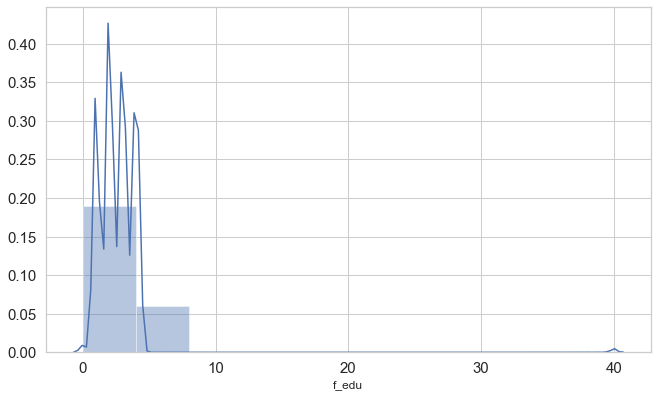

In [54]:
distplot(data.f_edu)

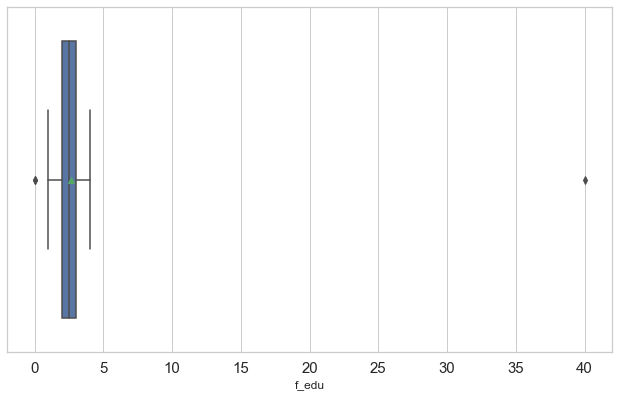

In [55]:
boxplot(data.f_edu)

In [56]:
data.loc[data.f_edu == 40]

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,study_time_2,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
11,GP,F,15,R,GT3,None,2.0,40.0,services,other,...,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


> * There is definitely an outlier with an unrealistic value

In [57]:
print(f"Mean father's education: {data.loc[data.f_edu != 40].f_edu.mean()}")
print(f"Median father's education: {data.loc[data.f_edu != 40].f_edu.median()}")

Mean father's education: 2.5176151761517613
Median father's education: 2.0


Let's substitute this value (40) with median in order not to delete the whole row:

In [58]:
data.f_edu = data.f_edu.apply(lambda x: data.loc[data.f_edu != 40].f_edu.median() if x == 40 else x)

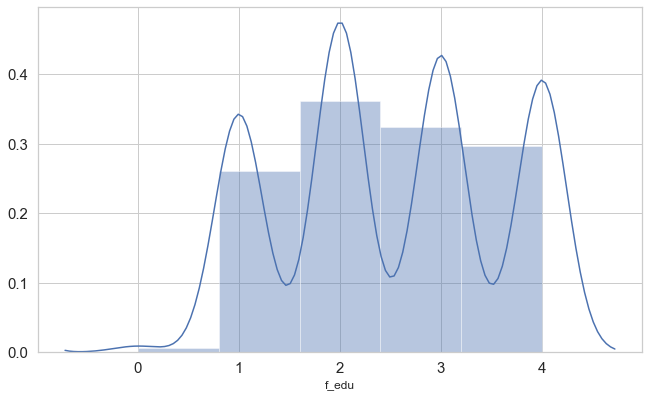

In [59]:
distplot(data.f_edu, bins=5)

In [60]:
data.loc[:, ['f_edu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_edu   370 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


### Mother's job

In [61]:
data.m_job.unique()

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

In [62]:
data.m_job = data.m_job.apply(nan_killer)
data.m_job.unique()

array(['at_home', 'health', 'other', 'services', 'teacher', None],
      dtype=object)

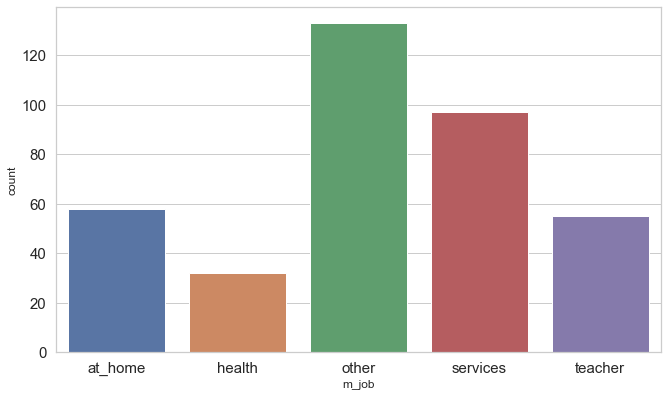

In [63]:
countplot(data.m_job)

In [64]:
data.loc[:, ['m_job']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   375 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


> * Most mothers work in some unknown (others) spheres and in services
> * The same number of mothers work at home and as teachers

### Father's job

In [65]:
data.f_job.unique()

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

In [66]:
data.f_job = data.f_job.apply(nan_killer)
data.f_job.unique()

array(['teacher', 'other', None, 'health', 'services', 'at_home'],
      dtype=object)

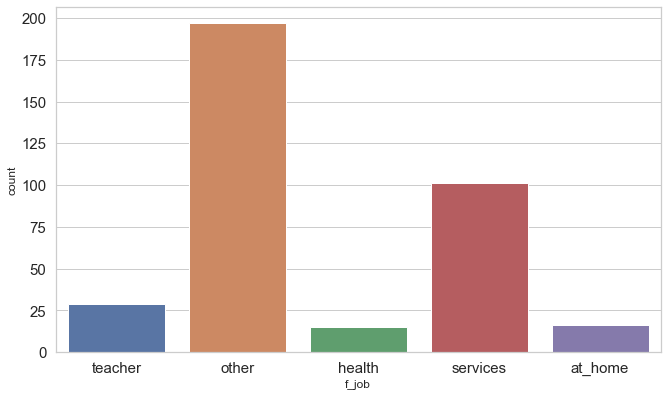

In [67]:
countplot(data.f_job)

In [68]:
data.loc[:, ['f_job']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   358 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


> * The similar situation is for fathers' most popular job spheres
> * Fathers' job distribution is more uneven than mothers'

### Reason for choosing a school

In [69]:
data.reason.unique()

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

In [70]:
data.reason = data.reason.apply(nan_killer)
data.reason.unique()

array(['course', 'other', 'home', 'reputation', None], dtype=object)

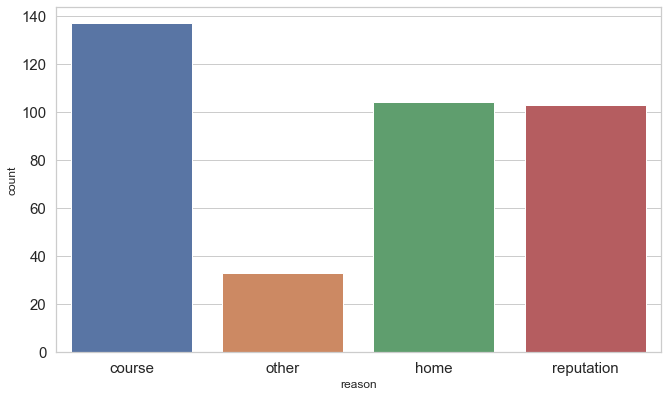

In [71]:
countplot(data.reason)

> * The educational course was the most popular reason for choosing a school
> * Similar amount of people chose home (distance from school) and reputation of school

### Guardian (who takes care of a student)

In [72]:
data.guardian.unique()

array(['mother', 'father', 'other', nan], dtype=object)

In [73]:
data.guardian = data.guardian.apply(nan_killer)
data.guardian.unique()

array(['mother', 'father', 'other', None], dtype=object)

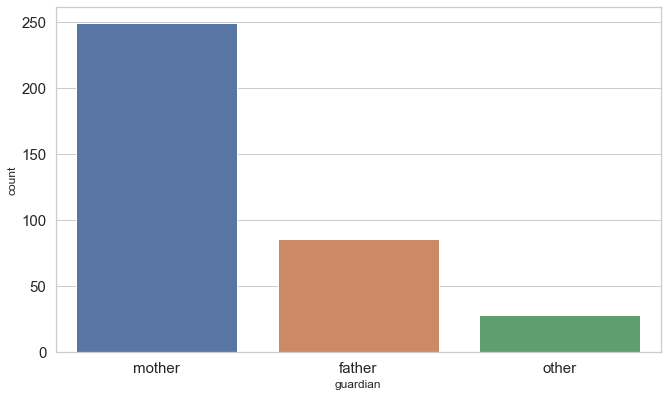

In [74]:
countplot(data.guardian)

> Usually a mother is who takes care of a student (more than 2 times more frequently than fathers)

### Travel time


In [75]:
data.travel_time.unique()

array([ 2.,  1.,  3., nan,  4.])

In [76]:
data.travel_time = data.travel_time.apply(nan_killer)
data.travel_time.unique()

array([ 2.,  1.,  3., nan,  4.])

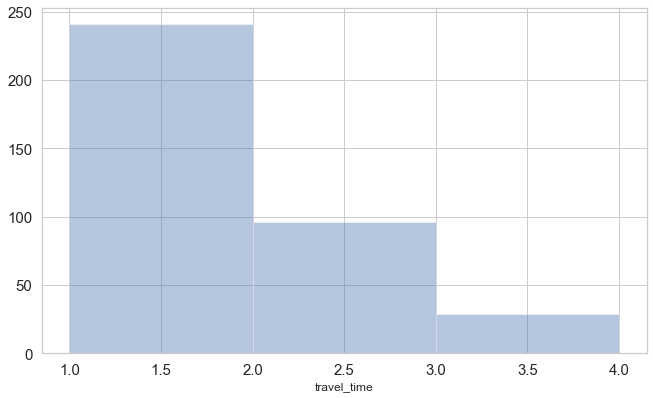

In [77]:
distplot(data.travel_time.astype(float), bins=3, kde=False)

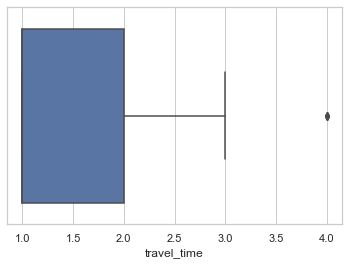

In [78]:
sns.boxplot(data.travel_time.astype(float))

In [79]:
data.loc[data.travel_time == 4]

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,study_time_2,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
61,GP,F,16,R,GT3,T,1.0,1.0,services,services,...,-3.0,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0
108,GP,M,15,R,GT3,None,4.0,4.0,other,other,...,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
149,GP,M,15,R,LE3,None,2.0,1.0,services,other,...,-3.0,NaN,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,...,-6.0,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
228,GP,M,18,R,None,T,2.0,1.0,at_home,other,...,-6.0,yes,yes,yes,4.0,3.0,2.0,3.0,14.0,45.0
327,GP,M,17,R,GT3,T,2.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,5.0,4.0,8.0,50.0
375,MS,F,18,R,GT3,T,1.0,1.0,other,other,...,-9.0,yes,yes,no,4.0,3.0,2.0,4.0,2.0,50.0


In [80]:
print(f"Mean travel time: {data.travel_time.mean()}")
print(f"Median travel time: {data.travel_time.median()}")

Mean travel time: 1.4398907103825136
Median travel time: 1.0


> * There are outliers who spend more than 60 minutes on their way to school
> * It is better to substitute this values instead of omitting the whole row

Let's fill this outliers with the biggest possible value according to IQR:

In [81]:
data.travel_time = data.travel_time.apply(lambda x: 3.0 if x == 4 else x)
data.loc[:, ['travel_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel_time  366 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


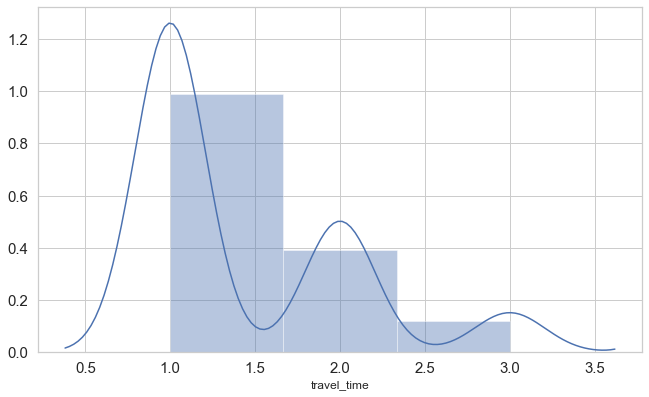

In [82]:
distplot(data.travel_time, bins=3)

As we can see, there are no significant changes in mean and median values: 

In [83]:
print(f"Mean travel time: {data.travel_time.mean()}")
print(f"Median travel time: {data.travel_time.median()}")

Mean travel time: 1.4207650273224044
Median travel time: 1.0


### Study time (per week)

In [84]:
display(data.study_time.unique())
display(data.study_time_2.unique())

array([ 2.,  3.,  1., nan,  4.])

array([ -6.,  -9.,  -3.,  nan, -12.])

In [85]:
data.study_time = data.study_time.apply(nan_killer)
data.study_time.unique()

array([ 2.,  3.,  1., nan,  4.])

> * The second column with study time contains unrealistic values
> * It is sensible to drop this column

In [86]:
data.drop(labels=['study_time_2'], inplace=True, axis=1)

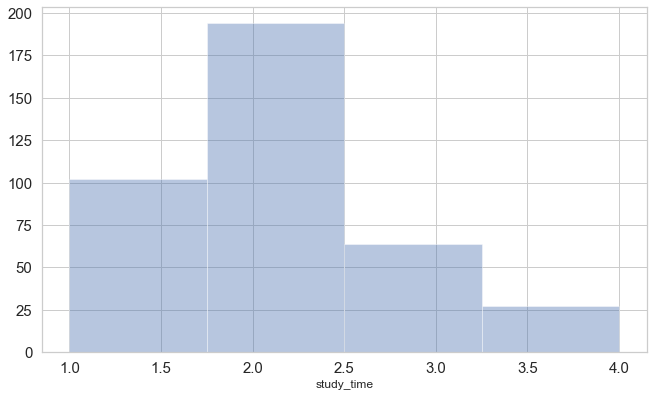

In [87]:
distplot(data.study_time, bins=4, kde=False)

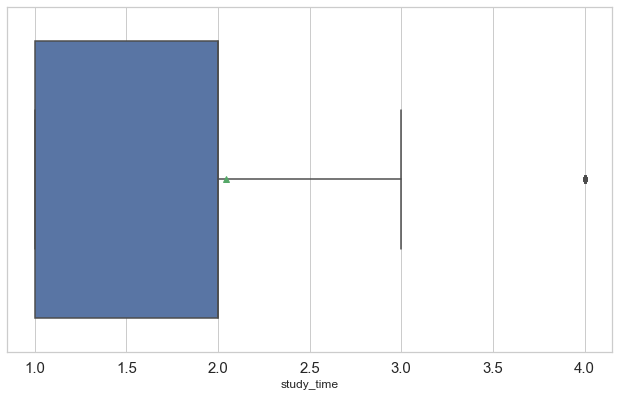

In [88]:
boxplot(data.study_time)

In [89]:
data.loc[data.study_time == 4]

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
47,GP,M,16,U,GT3,T,4.0,3.0,health,None,...,yes,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
66,GP,M,15,U,GT3,A,4.0,4.0,other,services,...,no,yes,yes,yes,1.0,3.0,3.0,3.0,4.0,60.0
67,GP,F,16,U,GT3,None,3.0,NaN,services,other,...,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
69,GP,F,15,U,LE3,T,3.0,1.0,other,other,...,no,yes,yes,no,4.0,4.0,2.0,3.0,12.0,80.0
70,GP,M,16,R,GT3,T,3.0,1.0,other,other,...,yes,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
71,GP,M,15,U,GT3,T,4.0,2.0,other,other,...,yes,yes,yes,no,3.0,3.0,3.0,3.0,0.0,50.0
76,GP,M,15,U,None,T,4.0,0.0,teacher,other,...,yes,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
77,GP,F,16,U,GT3,T,2.0,2.0,other,other,...,yes,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0
94,GP,M,15,U,LE3,T,2.0,2.0,services,health,...,yes,yes,yes,no,NaN,3.0,4.0,4.0,6.0,70.0
95,GP,F,15,U,GT3,T,1.0,1.0,at_home,other,...,yes,yes,yes,no,3.0,1.0,2.0,1.0,2.0,50.0


In [90]:
print(f"Mean study time: {data.study_time.mean()}")
print(f"Median study time: {data.study_time.median()}")

Mean study time: 2.041343669250646
Median study time: 2.0


> The are 27 students (outliers) who study more than 10 hours per week


In [91]:
print(f"Mean study time: {data.loc[data.study_time < 4].study_time.mean()}")
print(f"Median study time: {data.loc[data.study_time < 4].study_time.median()}")

Mean study time: 1.8944444444444444
Median study time: 2.0


In [92]:
data.loc[:, ['study_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   study_time  387 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


The amount of outliers is considerable but they don't change the measures of central tendency significantly so I will let them exist

### Failures

In [93]:
data.failures.unique()

array([ 0.,  3., nan,  2.,  1.])

In [94]:
data.failures = data.failures.apply(nan_killer)
data.failures.unique()

array([ 0.,  3., nan,  2.,  1.])

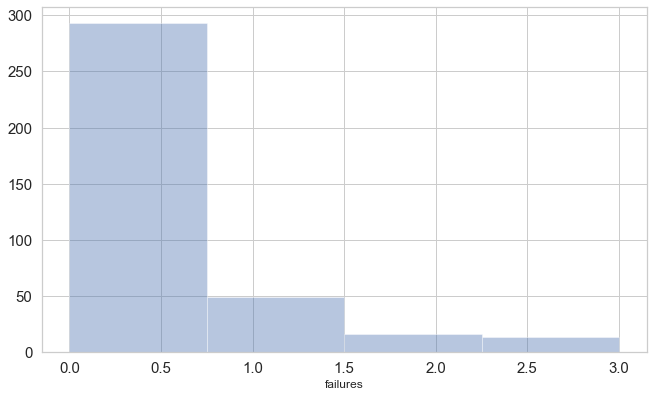

In [95]:
distplot(data.failures, bins=4, kde=False)

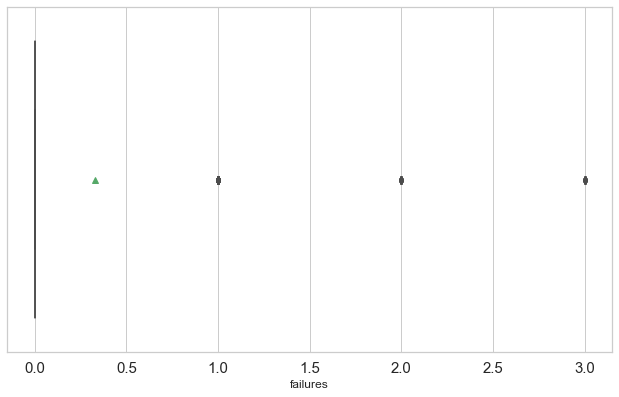

In [96]:
boxplot(data.failures)

In [97]:
data.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     14
Name: failures, dtype: int64

> * Three values out of four are considered as outliers
> * I won't delete them because otherwise every student will have zero failures

In [98]:
data.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  372 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


### School support


In [99]:
def dummy_maker(column):
    """
    This function makes a dummy variable
    from a column with two values (yes - 1, no - 0)
    """
    return column.map({'yes': 1, 'no': 0}, na_action='ingore')

In [100]:
data.school_sup.unique()

array(['yes', 'no', nan], dtype=object)

In [101]:
data.school_sup = data.school_sup.apply(nan_killer)
data.school_sup = dummy_maker(data.school_sup)
data.school_sup.unique()

array([ 1.,  0., nan])

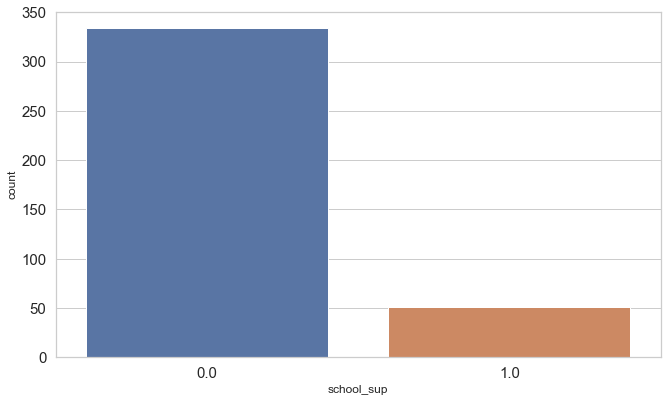

In [102]:
countplot(data.school_sup)

In [103]:
data.loc[:, ['school_sup']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school_sup  385 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


> Most students have no extra school support

### Family support

In [104]:
data.fam_sup.unique()

array(['no', 'yes', nan], dtype=object)

In [105]:
data.fam_sup = data.fam_sup.apply(nan_killer)
data.fam_sup = dummy_maker(data.fam_sup)
data.fam_sup.unique()

array([ 0.,  1., nan])

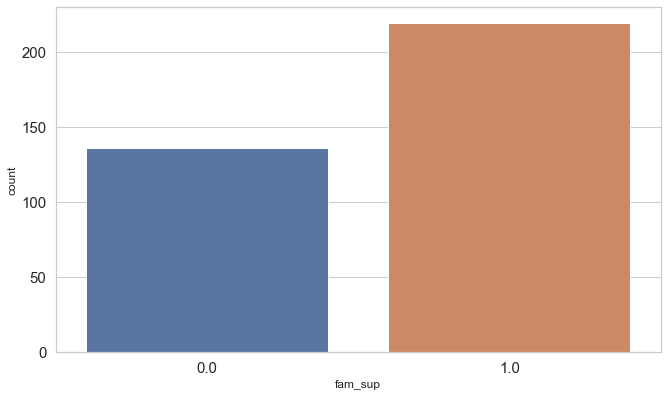

In [106]:
countplot(data.fam_sup)

In [107]:
data.loc[:, ['fam_sup']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fam_sup  355 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


> Most students receive family educational support

### Extra (paid) math lessons

In [108]:
data.paid.unique()

array(['no', nan, 'yes'], dtype=object)

In [109]:
data.paid = data.paid.apply(nan_killer)
data.paid = dummy_maker(data.paid)
data.paid.unique()

array([ 0., nan,  1.])

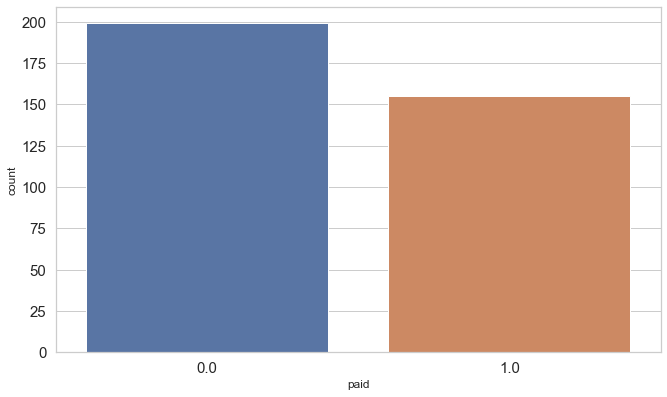

In [111]:
countplot(data.paid)

In [112]:
data.loc[:, ['paid']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   paid    354 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


> Most students don't have extra math lessons

### Extracurricular activities

In [113]:
data.activities.unique()

array(['no', 'yes', nan], dtype=object)

In [114]:
data.activities = data.activities.apply(nan_killer)
data.activities = dummy_maker(data.activities)
data.activities.unique()

array([ 0.,  1., nan])

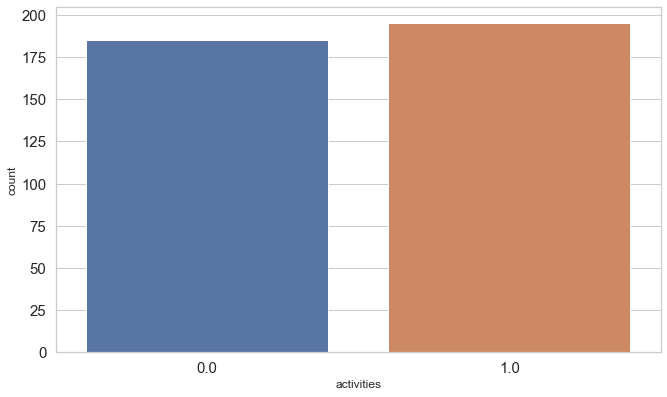

In [115]:
countplot(data.activities)

In [117]:
data.loc[:, ['activities']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   activities  380 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


> Almost equal parts of students have and don't have extracurricular activities

### Nursery

In [118]:
data.nursery.unique()

array(['yes', 'no', nan], dtype=object)

In [119]:
data.nursery = data.nursery.apply(nan_killer)
data.nursery = dummy_maker(data.nursery)
data.nursery.unique()

array([ 1.,  0., nan])

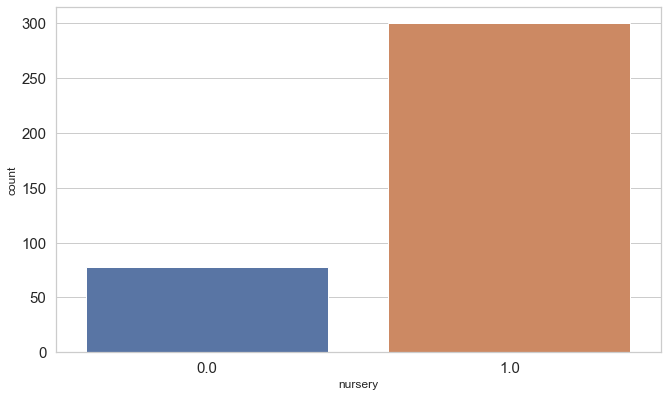

In [120]:
countplot(data.nursery)

In [122]:
data.loc[:, ['nursery']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nursery  378 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


> Most children visited a nursery school

### Desire to obtain higher education

In [123]:
data.higher.unique()

array(['yes', nan, 'no'], dtype=object)

In [124]:
data.higher = data.higher.apply(nan_killer)
data.higher = dummy_maker(data.higher)
data.higher.unique()

array([ 1., nan,  0.])

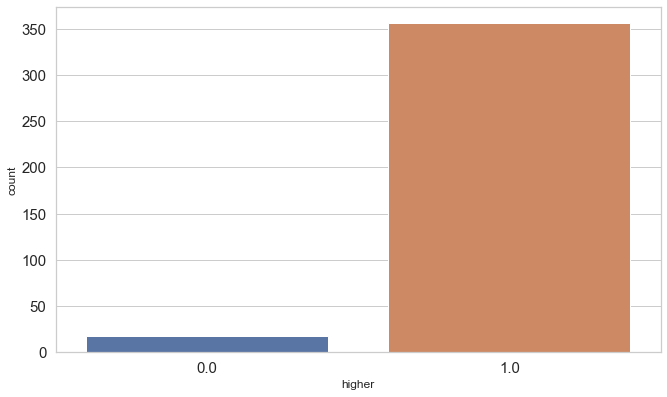

In [125]:
countplot(data.higher)

In [127]:
data.loc[:, ['higher']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   higher  374 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


> Most students would like to get higher education

### Internet access at home

In [128]:
data.internet.unique()

array([nan, 'yes', 'no'], dtype=object)

In [129]:
data.internet = data.internet.apply(nan_killer)
data.internet = dummy_maker(data.internet)
data.internet.unique()

array([nan,  1.,  0.])

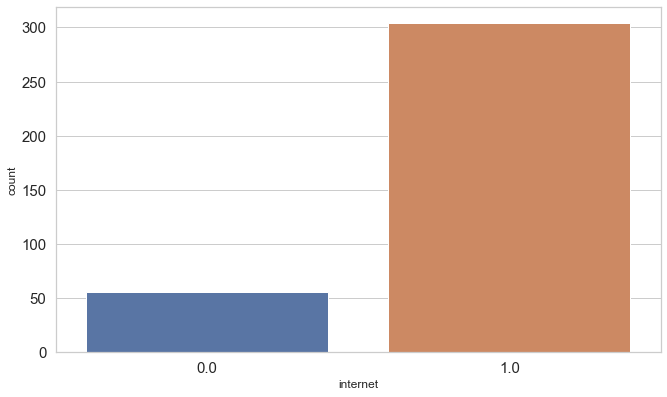

In [130]:
countplot(data.internet)

In [131]:
data.loc[:, ['internet']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   internet  360 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


> Most students have internet access

### Romantic relationships

In [132]:
data.romantic.unique()

array(['no', nan, 'yes'], dtype=object)

In [133]:
data.romantic = data.romantic.apply(nan_killer)
data.romantic = dummy_maker(data.romantic)
data.romantic.unique()

array([ 0., nan,  1.])

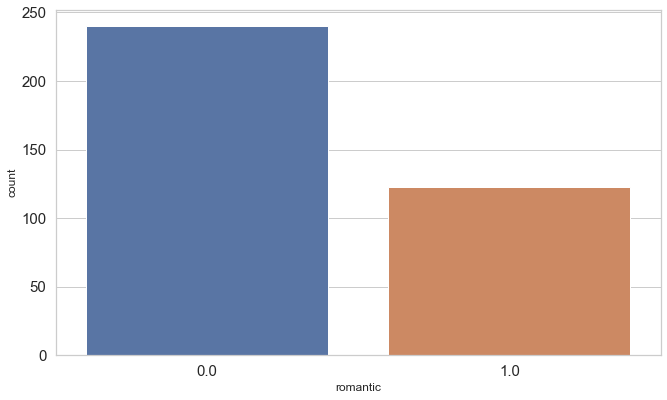

In [134]:
countplot(data.romantic)

> Most students are not in romantic relationships

### Family relationships

In [135]:
data.fam_rel.unique()

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

In [136]:
data.fam_rel = data.fam_rel.apply(nan_killer)
data.fam_rel = data.fam_rel.apply(lambda x: None if x == -1 else x)
data.fam_rel.unique()

array([ 4.,  5.,  3., nan,  2.,  1.])

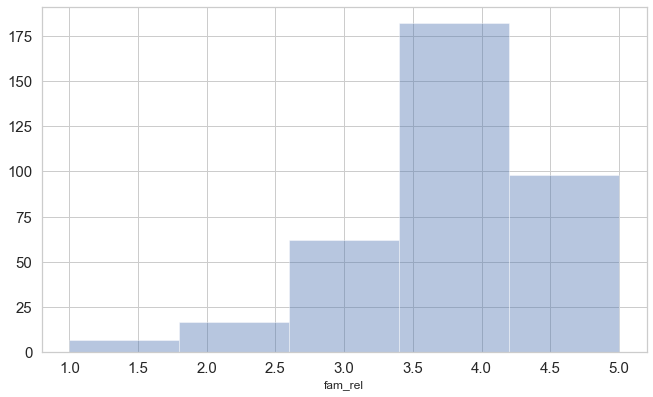

In [137]:
distplot(data.fam_rel, bins=5, kde=False)

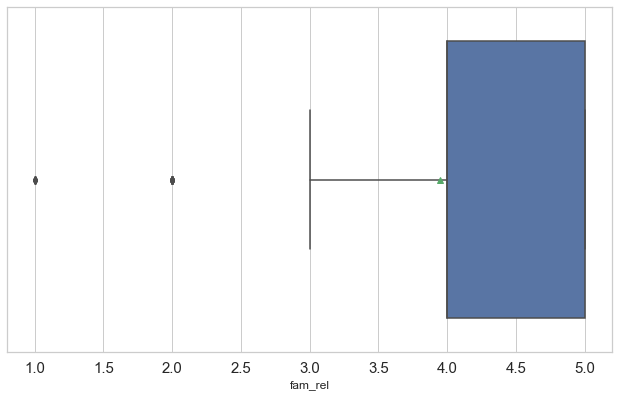

In [138]:
boxplot(data.fam_rel)

In [139]:
data.loc[:, ['fam_rel']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fam_rel  366 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


> * The part of students with bad family realtionships can be considered as outliers
> * I will leave them for better objectivity

### Free time

In [151]:
data.free_time.unique()

array([ 3.,  2.,  4.,  1.,  5., nan])

In [152]:
data.free_time = data.free_time.apply(nan_killer)
data.free_time.unique()

array([ 3.,  2.,  4.,  1.,  5., nan])

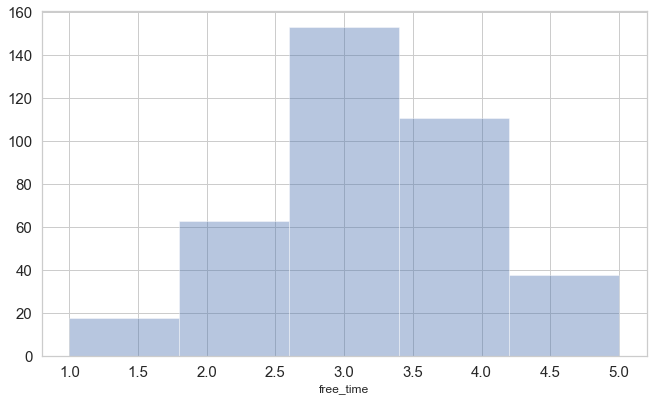

In [153]:
distplot(data.free_time, bins=5, kde=False)

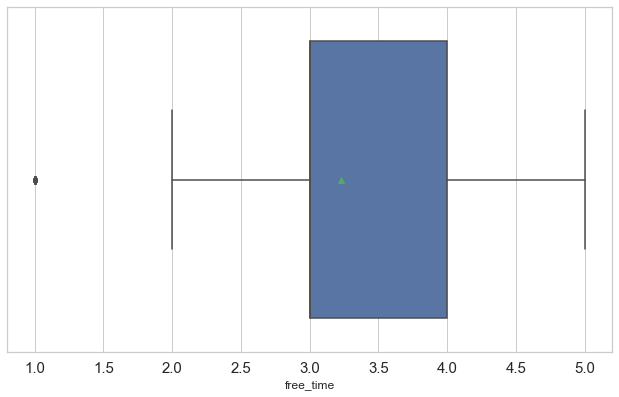

In [154]:
boxplot(data.free_time)

In [155]:
data.loc[data.free_time == 1]

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,1.0,1.0,0.0,0.0,4.0,1.0,4.0,1.0,6.0,30.0
19,GP,M,16,U,LE3,T,4.0,3.0,health,other,...,1.0,1.0,1.0,0.0,3.0,1.0,3.0,5.0,4.0,50.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,None,...,1.0,1.0,1.0,0.0,4.0,1.0,3.0,4.0,2.0,40.0
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,...,1.0,1.0,0.0,0.0,4.0,1.0,NaN,5.0,18.0,35.0
95,GP,F,15,U,GT3,T,1.0,1.0,at_home,other,...,1.0,1.0,1.0,0.0,3.0,1.0,2.0,1.0,2.0,50.0
106,GP,F,15,U,GT3,T,2.0,2.0,other,other,...,1.0,1.0,1.0,0.0,5.0,1.0,2.0,3.0,8.0,40.0
111,GP,F,16,U,GT3,T,3.0,3.0,services,other,...,1.0,1.0,1.0,0.0,4.0,1.0,2.0,2.0,0.0,50.0
112,GP,F,16,R,GT3,None,2.0,2.0,at_home,other,...,1.0,1.0,1.0,NaN,3.0,1.0,2.0,5.0,6.0,65.0
168,GP,F,16,U,GT3,T,2.0,2.0,other,other,...,0.0,1.0,1.0,0.0,5.0,1.0,5.0,4.0,0.0,0.0
189,GP,M,17,U,GT3,T,1.0,2.0,at_home,other,...,1.0,1.0,0.0,0.0,3.0,1.0,3.0,NaN,4.0,50.0


In [173]:
data.loc[:, ['free_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   free_time  383 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


> 18 students with the least free time are outliers

### Going out

In [156]:
data.go_out.unique()

array([ 4.,  3.,  2.,  1.,  5., nan])

In [157]:
data.go_out = data.go_out.apply(nan_killer)
data.go_out.unique()

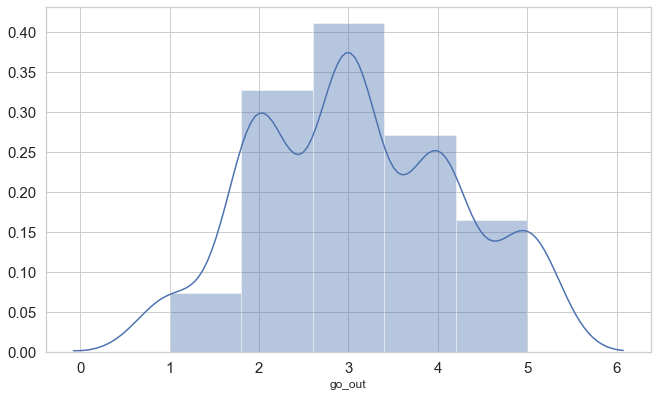

In [160]:
distplot(data.go_out, bins=5)

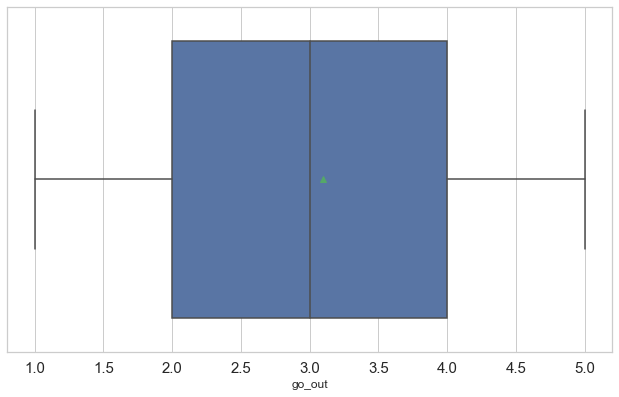

In [161]:
boxplot(data.go_out)

In [175]:
data.loc[:, ['go_out']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   go_out  386 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


> * The distribution of this feature is close to normal
> * No outliers

### Health

In [162]:
data.health.unique()

array([ 3.,  5.,  1.,  2.,  4., nan])

In [163]:
data.health = data.health.apply(nan_killer)
data.health.unique()

array([ 3.,  5.,  1.,  2.,  4., nan])

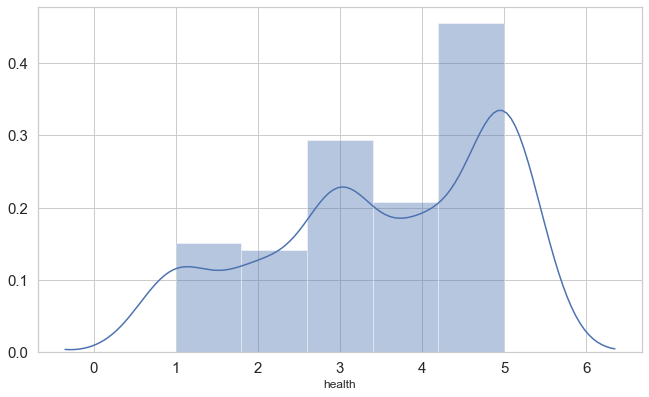

In [165]:
distplot(data.health, bins=5)

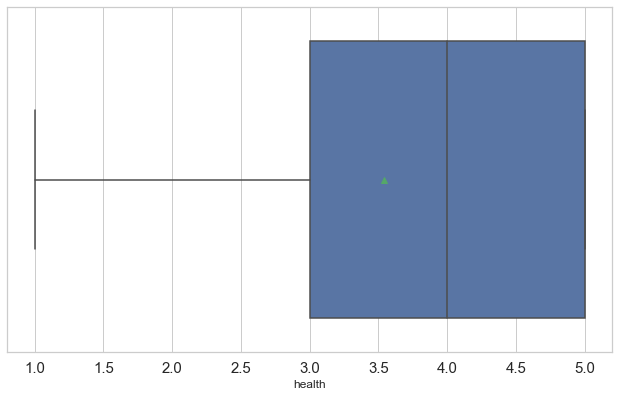

In [166]:
boxplot(data.health)

In [176]:
data.loc[:, ['health']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  379 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


> In average students have normal health

### Absences

In [167]:
data.absences.unique()

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

In [168]:
data.absences = data.absences.apply(nan_killer)
data.absences.unique()

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

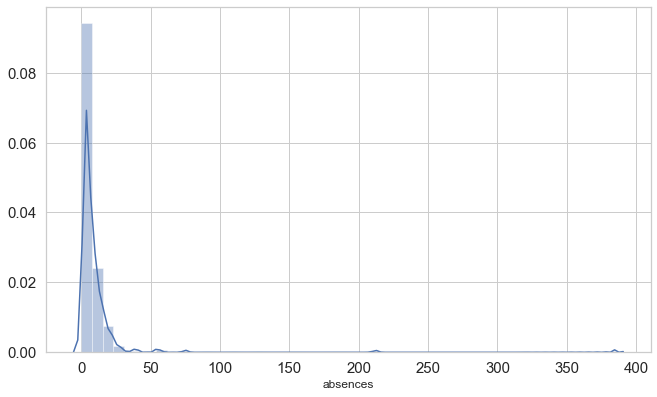

In [171]:
distplot(data.absences, bins=50)

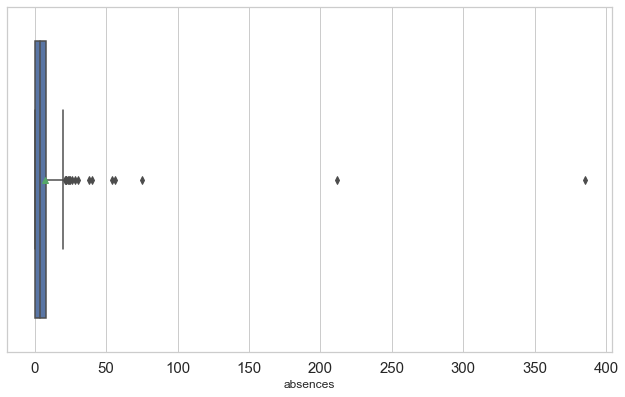

In [169]:
boxplot(data.absences)

In [177]:
data.loc[:, ['absences']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  382 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


> * Lots of outliers
> * It is sensible to omit some of them

In [180]:
print(f'Mean amount of absences: {data.absences.mean()}')
print(f'Median amount of absences: {data.absences.median()}')

Mean amount of absences: 7.2565445026178015
Median amount of absences: 4.0


Let's substitute nan-values and biggest outliers with median:

In [182]:
data.absences = data.absences.apply(lambda x: data.absences.median() if pd.isnull(x) or x >= 40 else x)
data.absences.unique()

array([ 6.,  4., 10.,  2.,  0., 16., 14.,  7.,  8., 25., 12., 18., 26.,
       20., 24., 28.,  5., 13., 15., 22.,  3., 21.,  1., 30., 19.,  9.,
       11., 38., 23., 17.])

Let's take a look at absences after correction:

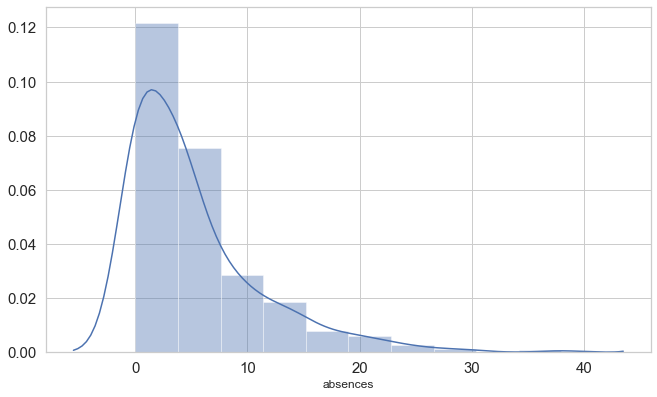

In [183]:
distplot(data.absences)

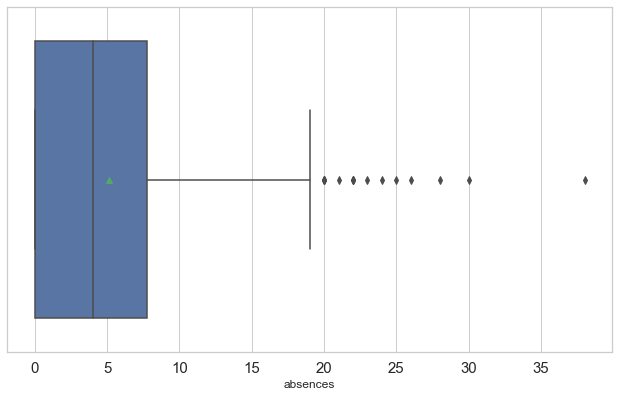

In [184]:
boxplot(data.absences)

In [186]:
print(f'Mean amount of absences: {data.absences.mean()}')
print(f'Median amount of absences: {data.absences.median()}')

Mean amount of absences: 5.131979695431472
Median amount of absences: 4.0


In [185]:
data.loc[:, ['absences']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  394 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


> * So the missing values are filled and the most considerable outliers are executed

### *Math score (!)*

In [187]:
data.score.unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

In [188]:
data.score = data.score.apply(nan_killer)
data.score.unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

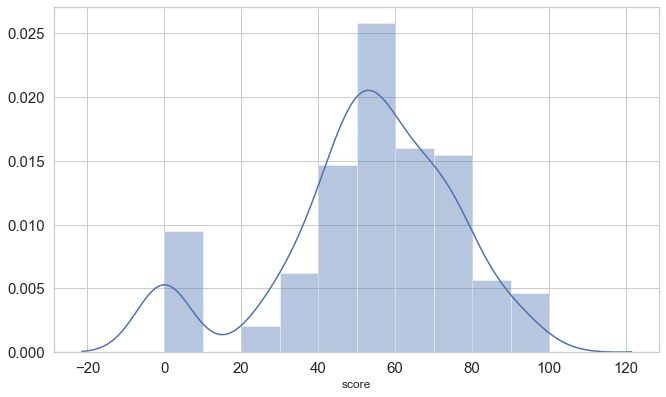

In [189]:
distplot(data.score, bins=10)

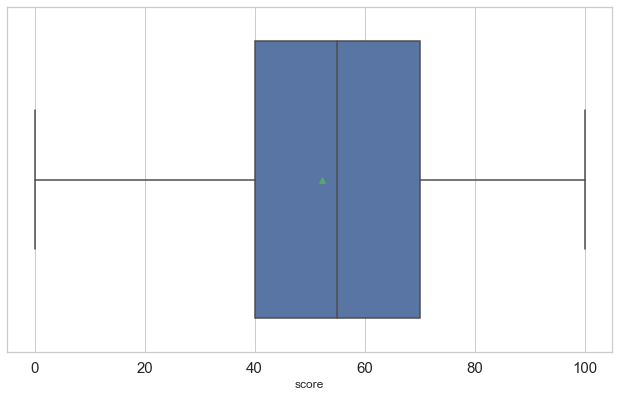

In [190]:
boxplot(data.score)

In [192]:
data.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   388 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


> * No outliers
> * Quite a normal distribution
> * 6 missing values

# Correlation analysis

## Numeric features

In [208]:
data.corr().loc[:, ['score']]

,score
age,-0.153518
m_edu,0.210142
f_edu,0.127795
travel_time,-0.074888
study_time,0.114325
failures,-0.345624
school_sup,-0.089246
fam_sup,-0.009404
paid,0.098673
activities,0.009356


These columns definitely have no correlation (or very weak correlation) with math exam score: fam_sup, activities, free_time, absences, health

## Categorial features